# **Project Everest Report - Jakub Bartnik**

Author: Jakub Bartnik

## GitHub URL 

https://github.com/jakubbartnik/UCDPA_jakubbartnik

##Abstract 

This review contains the summary about impact of introducing new safety gear for climbing versus expedition survival that climbed in area of Hymalaya Nepal within last 100 years. Implememntation process contain six parts: setting goal, data preparation, data exploration, data modeling. The review will explain how all that was done by myself and what conclusion I made from results. 
* All this report content can be found in my python notebook including the code.

There is another python notebook in repository demonstrating simple webscrapping. File name is Web_scrapping_quotes.ipynb.

##Introduction

I decided upon this topic as climbing is, quite simply, my passion. As this is my first Data Science Project I felt that I should choose a topic that I am familiar with.
The aim of this research is to ascertain if, after the introduction of safety equipment such as steel carabiners (1910) or dynamic rope and harness (1964), there has been any improvement in Nepal Himalaya area climber's survival rates. My research is based on a Mount Everest dataset that tracks all expeditions that climbed in area of Nepal Himalaya from 1905 to 2019.
In recent years there have been more deaths on Mount Everest caused by climbers waiting in queues on the mountain between sections than due to failures of equipment or the difficulty of the climb (please refer to article provided in reference section). I would like to determine what the capacity of the mountain is to safely accommodate climbers during the climbing season and predict the number of climbers attempting to climb the mountain over the next two years. Within the dataset there is a field with the title 'Insufficient Supplies'. Analysis of this data I believe can help to indicate the historical point at which queues started to become a feature of attempting to climb Everest. It is my belief that this information will prove useful to expedition organisers when planning their supply requirements for expeditions to the mountain.

##Dataset

The Himalayan Database is a compilation of records for all expeditions that have climbed in the Nepal Himalaya. The database is based on the expedition archives of Elizabeth Hawley, a longtime journalist based in Kathmandu, and it is supplemented by information gathered from books, alpine journals and correspondence with Himalayan climbers.
The data cover all expeditions from 1905 through Spring 2019 to more than 465 significant peaks in Nepal. Also included are expeditions to both sides of border peaks such as Everest, Cho Oyu, Makalu and Kangchenjunga as well as to some smaller border peaks. Data on expeditions to trekking peaks are included for early attempts, first ascents and major accidents.




##Implementation Process

###Setting goals
I like to split my main goal from introduction into smaller chunks that will be easier to archive and at the same time makes this review more structured and hopefully readable. 
 - Goal 1 is to check impact of first climbing carabineer on expedition survival rate. Carabiner was developed in 1910. Therefore I am going to split all dataframe into two sets and compare the falls.

- Goal 2 is about introduction of dynamic rope and harness in 1960’s. I am going to split all data and compare periods with and without it.

- Goal 3 is to figure out when queues started to be formed and what would be climbers capacity for Mount Everest before it will became a problem.

###Data preparation
I started to look at the data manually prior writing this review. Those data are splited between three csv files and I belive for my pourpose I want to merge them all in one file. I going to import all libraries in first code box and keep updating it based on functions I want to use later in the code. This hopefully makes a sense later where I dont have to look over all code boxes in python notebook and run each one of them in case of missing one library.

In [26]:
#importing libraries
import pandas as pd
import numpy as np
from dataclasses import replace
import matplotlib.pyplot as plt
import seaborn as sns

#dummy variable
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split



Reading data from all three csv (expeditions.csv, peaks.csv, members.csv). I am using commands like .shape and .info. Those commands showing me column names and few records for examination but at the same time it gives me number of records. Thanks to that I know that expeditions dataframe is 10364 rows and 16 columns, peak.csv is 467 rows and 8 columns and members.csv is 76519 rows and 21 columns.

In [27]:
#importing everest data 
df_exp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/everest_data/expeditions.csv')
df_peaks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/everest_data/peaks.csv')
df_mem = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/everest_data/members.csv')

#basic overview on data
print('shape of expeditions - ', df_exp.shape)
print('shape of peaks - ', df_peaks.shape)
print('shape of members - ', df_mem.shape)


shape of expeditions -  (10364, 16)
shape of peaks -  (468, 8)
shape of members -  (76519, 21)


 I am exploring all csv one by one using .head() which shows me five first rows to identify best column I can merge with another dataframe.

In [ ]:
df_exp.head()

In [ ]:
df_peaks.head()

In [ ]:
df_mem.head()

This is how I identified column ‘peak_id’ to merge expeditions.csv with peak.csv and assigned it to ‘df1’ as temporary dataframe.

In [28]:
df1 =df_exp.merge(df_peaks ,on ='peak_id') 
print(df1.shape) 
df1.head()

(10363, 23)


,expedition_id,peak_id,peak_name_x,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,...,hired_staff_deaths,oxygen_used,trekking_agency,peak_name_y,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
0,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,...,0,True,NaN,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
1,ANN269301,ANN2,Annapurna II,1969,Autumn,1969-09-25,1969-10-22,1969-10-26,Success (main peak),7937.0,...,0,False,NaN,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
2,ANN273101,ANN2,Annapurna II,1973,Spring,1973-03-16,1973-05-06,NaN,Success (main peak),7937.0,...,0,False,NaN,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
3,ANN278301,ANN2,Annapurna II,1978,Autumn,1978-09-08,1978-10-02,1978-10-05,"Bad weather (storms, high winds)",7000.0,...,0,False,NaN,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
4,ANN279301,ANN2,Annapurna II,1979,Autumn,NaN,1979-10-18,1979-10-20,"Bad weather (storms, high winds)",7160.0,...,0,False,NaN,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101


Next I done the same with my temporary dataframe and members.csv based on ‘expedition_id’ and assigned it to dataframe -’df’. I did used .merge command to combine all three csv’s.

In [29]:
df = df1.merge(df_mem ,on ='expedition_id') 
print(df.shape) 
df.head()

(76511, 43)


,expedition_id,peak_id_x,peak_name_x,year_x,season_x,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres_x,...,highpoint_metres_y,success,solo,oxygen_used_y,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres
0,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
1,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,...,7937.0,True,False,True,False,NaN,NaN,False,NaN,NaN
2,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,...,7250.0,False,False,False,False,NaN,NaN,False,NaN,NaN
3,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,...,7250.0,False,False,False,False,NaN,NaN,False,NaN,NaN
4,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,...,7937.0,True,False,True,False,NaN,NaN,False,NaN,NaN


At this point I started looking for empty values in my current dataframe – ‘df’. I am using .isna() function to show all ‘nan’ values. Because I find the column that will make significant impact on my results I want to take closer look at column ‘death_cause’. That is why I am using df[‘death_cause’].unique() function.

In [ ]:
print(df.isna().sum().sort_values())

In [ ]:
#printing unique values
print(df['death_cause'].unique())

Thanks to that I see that value ‘Other’ is not really make more sense then ‘nan’ or ‘unknown’ but it generate more noise so I am replacing all ‘Other’ with ‘nan’. 

In [30]:
#replacing empty values
df['death_cause'] = df.death_cause.replace(['Other'], [np.nan])
#verifying that "Other" has been replaced with nan
print(df['death_cause'].unique())

[nan 'Fall' 'Exposure / frostbite' 'Avalanche' 'AMS' 'Unknown'
 'Illness (non-AMS)' 'Falling rock / ice' 'Exhaustion'
 'Disappearance (unexplained)' 'Crevasse' 'Icefall collapse']


To limit variables in current dataset that are mainly repeated like year_x and year_y I will drop some of the columns that came after merging. Important columns from expedition.csv is ‘termination_reason’ and ‘expedition_id’, ‘year’. Important columns from peaks.csv is ‘peak_name’ and ‘climbing_status’. Important columns from members.csv is ‘death_cause’.Those I belive are important columns I want to keep. I will drop  the following columns that are not important:  'trekking_agency', 'peak_alternative_name', 'sex', 'expedition_role', 'injury_type', 'injury_height_metres', 'oxygen_used_x', 'age', 'first_ascent_country', 'hired', 'success', 'member_id', 'highpoint_metres_y', 'oxygen_used_y', 'died', 'death_height_metres', 'injured', 'citizenship', 'solo', 'year_y', 'season_y', 'peak_name_y', 'peak_name_x', 'peak_id_y', 'peak_id_x', 'season_x', 'climbing_status', 'first_ascent_expedition_id'. Result of dataframe without dropped columns was saved to temporary dataframe ‘cleaning’  

In [31]:
#droping non-inportant columns
cleaning = df.drop(columns=['trekking_agency', 'peak_alternative_name', 'sex', 'expedition_role', 'injury_type', 'injury_height_metres', 'oxygen_used_x', 'age', 'first_ascent_country', 'hired', 'success', 'member_id', 'highpoint_metres_y', 'oxygen_used_y', 'died', 'death_height_metres', 'injured', 'citizenship', 'solo', 'year_y', 'season_y', 'peak_name_y', 'peak_name_x', 'peak_id_y', 'peak_id_x', 'season_x', 'climbing_status', 'first_ascent_expedition_id'])

In [ ]:
cleaning.head()

Dropped columns did not stopped me to find duplicates in this dataframe but as this review is about expeditions there was no need to have all members listedwhere most of the values were repeated per expedition. Right now i will be able to find all duplicates that can be dropped and makes more sense for this review. I done that based on field ‘expedition_id’. I sorted values and finally dropped it and result saved to ‘exp_dup’. 

In [32]:
#finding duplicates
duplicates = cleaning.duplicated(subset='expedition_id', keep=False)

#sorting duplicates
duplicated_expedition = cleaning[duplicates].sort_values(by ='expedition_id') 

# printing relevant columns of duplicated_expedition
print(duplicated_expedition[['expedition_id']]) 

      expedition_id
75903     ACHN15301
75902     ACHN15301
75906     ACHN15301
75905     ACHN15301
75904     ACHN15301
...             ...
74525     YAUP17101
74515     YAUP89301
74516     YAUP89301
74517     YAUP89301
74518     YAUP89301

[75741 rows x 1 columns]


In [33]:
# Drop complete duplicates from cleaning 
exp_dup = cleaning.drop_duplicates()

#printing relevant columns of duplicated
print(exp_dup[['expedition_id']])

      expedition_id
0         ANN260101
19        ANN269301
29        ANN273101
35        ANN278301
37        ANN279301
...             ...
76478     NUPL18301
76490     TILK18301
76495     YARA18301
76498     GYLZ19101
76508     SANK19101

[11052 rows x 1 columns]


Stripping down string from expedition_id using simple regex.

In [42]:
#removing strings from expedition_id using regex
exp_dup['expedition_id'].replace(to_replace=r'([a-zA-Z]+)', value='', regex=True)

0        260101
19       269301
29       273101
35       278301
37       279301
          ...  
76478     18301
76490     18301
76495     18301
76498     19101
76508     19101
Name: expedition_id, Length: 11052, dtype: object

Cleaned data I saved to new file clean_everest.csv to avoid running all code boxes in python notebook. 

In [39]:
#saving current content to a file 
exp_dup.to_csv("/content/drive/MyDrive/Colab Notebooks/everest_data/clean_everest.csv")

###Data exploration
Cleaned data saved as result of cleaning are loaded as ‘dfc’.   

In [45]:
dfc = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/everest_data/clean_everest.csv")
print(dfc.columns)

Index(['Unnamed: 0', 'expedition_id', 'year_x', 'basecamp_date',
       'highpoint_date', 'termination_date', 'termination_reason',
       'highpoint_metres_x', 'members', 'member_deaths', 'hired_staff',
       'hired_staff_deaths', 'height_metres', 'first_ascent_year', 'peak_name',
       'death_cause'],
      dtype='object')


Features termination_reson and death_cause are nominal i need to convert it to dummy variables. I am doing it using dataframe option ‘.get_dummies’. 

In [46]:
pd.get_dummies(dfc, columns=['death_cause', 'termination_reason'])

,Unnamed: 0,expedition_id,year_x,basecamp_date,highpoint_date,termination_date,highpoint_metres_x,members,member_deaths,hired_staff,...,termination_reason_Did not reach base camp,"termination_reason_Illness, AMS, exhaustion, or frostbite",termination_reason_Lack (or loss) of supplies or equipment,termination_reason_Lack of time,termination_reason_Other,"termination_reason_Route technically too difficult, lack of experience, strength, or motivation",termination_reason_Success (claimed),termination_reason_Success (main peak),termination_reason_Success (subpeak),termination_reason_Unknown
0,0,260101,1960,1960-03-15,1960-05-17,NaN,7937.0,10,0,9,...,0,0,0,0,0,0,0,1,0,0
1,19,269301,1969,1969-09-25,1969-10-22,1969-10-26,7937.0,10,0,0,...,0,0,0,0,0,0,0,1,0,0
2,29,273101,1973,1973-03-16,1973-05-06,NaN,7937.0,6,0,8,...,0,0,0,0,0,0,0,1,0,0
3,35,278301,1978,1978-09-08,1978-10-02,1978-10-05,7000.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,279301,1979,NaN,1979-10-18,1979-10-20,7160.0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11047,76478,18301,2018,2018-10-28,2018-11-02,2018-11-03,6861.0,7,0,5,...,0,0,0,0,0,0,0,1,0,0
11048,76490,18301,2018,2018-10-06,2018-10-15,2018-10-20,6369.0,5,0,0,...,0,0,0,0,0,0,0,1,0,0
11049,76495,18301,2018,2018-09-10,2018-10-10,NaN,5900.0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
11050,76498,19101,2019,2019-04-03,2019-04-09,2019-04-12,6151.0,6,0,4,...,0,0,0,0,0,0,0,1,0,0


To  get feeling an overview current dataset I want to show overall procentage of reasons to die in Himalaya based on all 114 years of experience. I am not really curius about exact procentage value but more generic representaion. I am going to represent this using pie chart. 

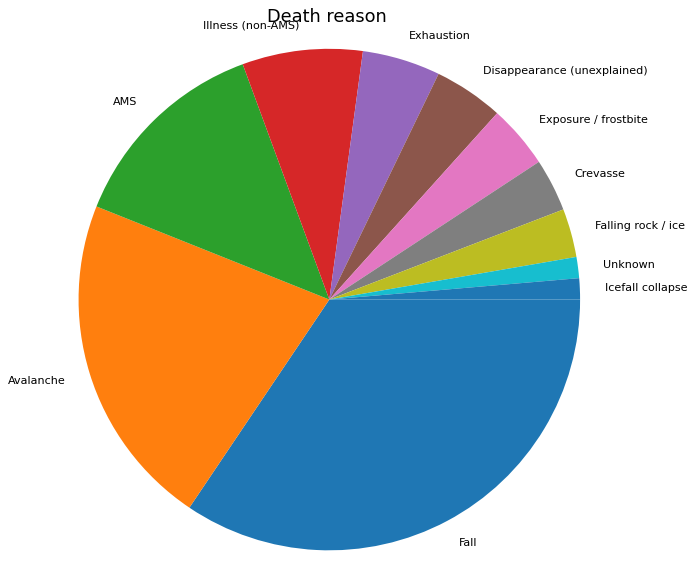

In [49]:
reason = dfc['death_cause']
sum_reason = reason.value_counts()
plt.figure(figsize=(9,9), dpi=80)
plt.pie(sum_reason, labels=sum_reason.index.tolist(), counterclock=False, startangle=0)
plt.axis('equal')
plt.title('Death reason', fontsize=16)
plt.show()

Graph 1. Death reason based on 114 years dataframe.



Avalanches, AMS(Alternated Mind status - caused by trauma or intoxication) and Illnes are the main reasons for death after falling. The same chart and same period of time just on termination reason for expeditions. 

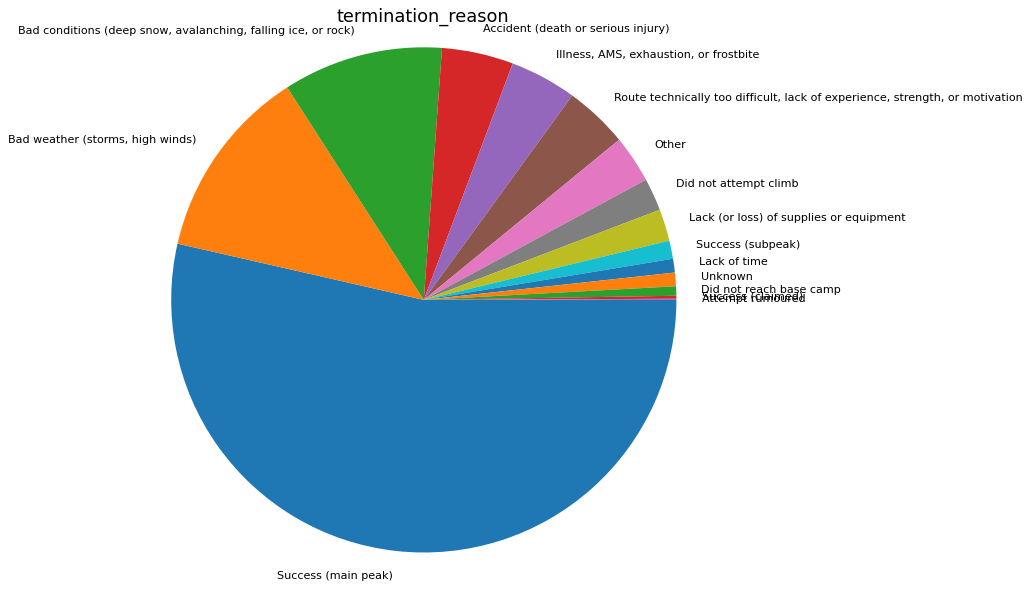

In [5]:
termination=dfc['termination_reason']
sum_reason = termination.value_counts()
plt.figure(figsize=(9,9), dpi=80)
plt.pie(sum_reason, labels=sum_reason.index.tolist(), counterclock=False, startangle=0)
plt.axis('equal')
plt.title('termination_reason', fontsize=16)
plt.show()

Graph 2. Termination reason based on 114 years data

This column will get useful further in this paper when I will try to narrow down ‘goal 3’.

Getting back to our goals and split data for goal 1 which is before 1910 assign it to dataframe ‘before1910’ and after 1911 assigned to ‘after1910’ . For goal 2 I will split from 1905 to 1960 and assigned to ‘no_harness_rope’ and from 1961 to 2019 assigned to ‘yes_harnes_rope’

In [54]:
#spliting dfc for goal 1.
before1910 = dfc[dfc['year_x'] < 1910]
after1910 = dfc[dfc['year_x'] > 1911]

#spliting dfc for goal 2.
no_harness_rope = dfc[dfc['year_x'] < 1960]
yes_harness_rope = dfc[dfc['year_x'] > 1961]


Before in the cleaning part there were columnes dropped as non-important for this review. At the moment as I am thinking to build predictive model I want to drop another column called 'peak_name' as its not numerical. 

In [55]:
before1910 = before1910.drop(columns=['peak_name'])
after1910 = after1910.drop(columns=['peak_name'])
no_harness_rope = no_harness_rope.drop(columns=['peak_name'])
yes_harness_rope = yes_harness_rope.drop(columns=['peak_name'])

I want to keep exploring to find at least "apparent effect" that reasons are changing within the years.

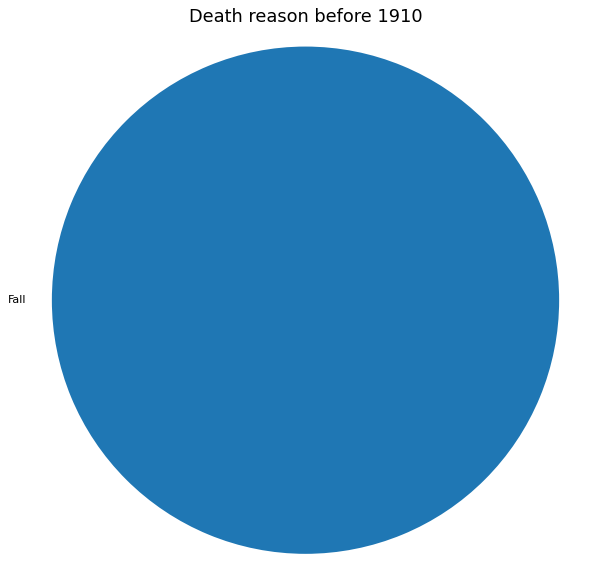

In [56]:
reason_before1910 = before1910['death_cause']
sum_reason = reason_before1910.value_counts()
plt.figure(figsize=(9,9), dpi=80)
plt.pie(sum_reason, labels=sum_reason.index.tolist(), counterclock=False, startangle=0)
plt.axis('equal')
plt.title('Death reason before 1910', fontsize=16)
plt.show()

Graph 3: Death reason before 1910

The result is actually schocking it appear that falling was the only reason to die in high montains before 1910. Other reasons like frostbite, ilness or avalanche was not the case in this years. However while looking at amount of records used for this graph its obvious that there was not enough observations.

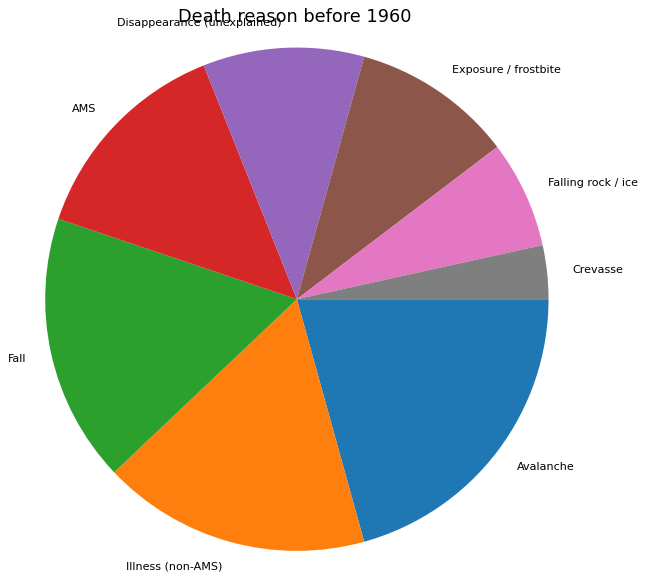

In [57]:
reason_no_harness_rope = no_harness_rope['death_cause']
sum_reason = reason_no_harness_rope.value_counts()
plt.figure(figsize=(9,9), dpi=80)
plt.pie(sum_reason, labels=sum_reason.index.tolist(), counterclock=False, startangle=0)
plt.axis('equal')
plt.title('Death reason before 1960', fontsize=16)
plt.show()

Graph 4: Death reason before 1960

Pie chart for data before 1960 indicate that avalanche and ilness was the biggest reasons to die and falling going into third place. 

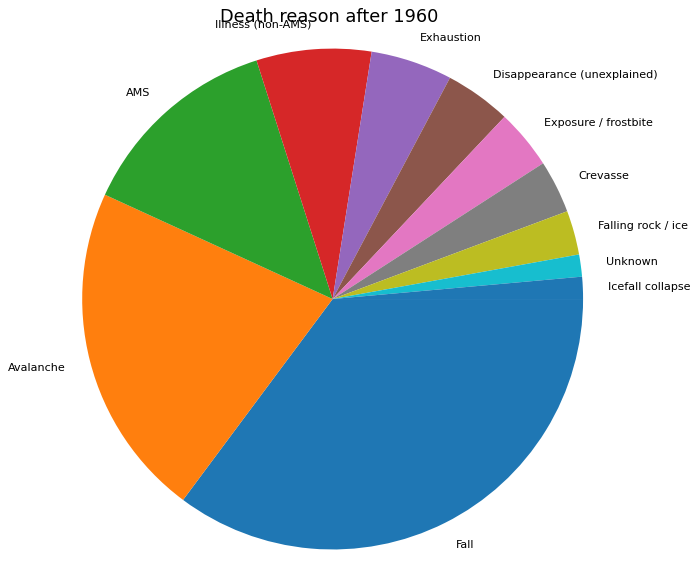

In [58]:
reason_yes_harness_rope = yes_harness_rope['death_cause']
sum_reason = reason_yes_harness_rope.value_counts()
plt.figure(figsize=(9,9), dpi=80)
plt.pie(sum_reason, labels=sum_reason.index.tolist(), counterclock=False, startangle=0)
plt.axis('equal')
plt.title('Death reason after 1960', fontsize=16)
plt.show()

Graph 5: Death reason after 1960

Graphs 5 and 1 are very similar but graphs 3 and 4 indicating that resons were changing along the years . 

###Data modeling

Chi-Squared Test for comparing. I want to predict more samples for befo1910 set. 


Stratified Train-Test Splits
One final consideration is for classification problems only.

Some classification problems do not have a balanced number of examples for each class label. As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

This is called a stratified train-test split.
from**
https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/



 * * * * * *  * Next I am going to generate more samples for before1910 and compare it with after1910. not sure which algorithm should I use for this comparation.

convert nominal to numerical values
 https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

generating more samples:
https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/


comparing:
https://towardsdatascience.com/how-to-compare-two-or-more-distributions-9b06ee4d30bf

##Results
(include the charts and describe them

##Insights
(point out at least 5 insights in bullet points

###References

Data_set - https://www.kaggle.com/datasets/majunbajun/himalayan-climbing-expeditions

Article - https://www.theguardian.com/world/2020/jun/06/everyone-is-in-that-fine-line-between-death-and-life-inside-everests-deadliest-queue

convert nominal to numerical values
 https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

generating more samples:
https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/


comparing:
https://towardsdatascience.com/how-to-compare-two-or-more-distributions-9b06ee4d30bf

###Jakub Checklist 

This section is for me to make sure I am verifying myself according to quidelines
- [x] this document contain 1500 to 2000 words
1. Real-world Scenario
- [x] project is using real-world dataset and include reference in report(5)
2. Importing data
- [x] making use of API, relational db, webscrapping(10)
- [x] imported CSV file into pandas DT(10)
3. Analysing Data
- [x] used regex to extract pattern in data(10)
- [x] replaced missing values or droped duplicates(10)
- [x] used iterators (5)
- [x] Merged DataFrames(5)
4. Python
- [ ] defined a custom function to create reusable code (5)
- [x] NumPy (5)
- [ ] Dictionary or lists (5)
5. Machine Learning (30)
- [ ] Predict Target variable with Supervised or Unsupervised algorithm (any alg. you like)
- [ ] Perform Hyper Parameter tuning or boosting if relevant if not just justyfy that in report and Python comments
6. Visualise
- [x] Present two charts in Seaborn or Matplotlib (10)
7. Generate valuable Insights
- [ ] mentioned 5 insights from the Project(10)
8. Report(30)

